In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import config

In [75]:
from enum import Enum
class DFUData(Enum):
    L = 0 # Left Foot
    R = 1 # Right Foot
    L_LCA = 2  # Angiosom LCA Left Foot 
    R_LCA = 3  # Angiosom LCA Right Foot
    L_LPA = 4  # Angiosom LPA Left Foot 
    R_LPA = 5  # Angiosom LPA Right Foot 
    L_MCA = 6  # Angiosom MCA Left Foot 
    R_MCA = 7  # Angiosom MCA Right Foot 
    L_MPA = 8  # Angiosom MPA Left Foot 
    R_MPA = 9  # Angiosom MPA Right Foot 


class INAOEDataset():
    def __init__(self, root_path, dm_group = False):
        cg_path = os.path.join(root_path, 'Control Group')
        dm_path = os.path.join(root_path, 'DM Group')

        self.dm_group = dm_group

        self.cg_subjects = sorted(list(map(lambda x: os.path.join(cg_path, x), os.listdir(cg_path))))
        self.dm_subjects = sorted(list(map(lambda x: os.path.join(dm_path, x), os.listdir(dm_path))))

    def set_group(self, dm_group):
        self.dm_group = dm_group

    def __len__(self):
        if self.dm_group:
            return len(self.dm_subjects)
        
        return len(self.cg_subjects) 

    def get_subjects_names(self):
        dataset = self.dm_subjects if self.dm_group else self.cg_subjects
        return list(map(lambda x: os.path.basename(x), dataset))

    def get_subject(self, idx, data:DFUData):
        dataset = self.dm_subjects if self.dm_group else self.cg_subjects

        subject = os.path.basename(dataset[idx])
        path = os.path.join(dataset[idx], 'Angiosoms') if data.value > 1 else dataset[idx]
        return pd.read_csv(os.path.join(path, subject + '_' + data.name + '.csv'), header=None)

In [76]:
dataset = INAOEDataset(config.INAOE_DATASET_DIR)

In [90]:
from scipy.stats import skew, kurtosis

def get_metrics(dataset, data:DFUData):
    subjects = dataset.get_subjects_names()
    mean_data = []
    std_data = []
    max_data = []
    min_data = []
    skew_data = []
    kurtosis_data = []
    metrics = []
    for idx in range(len(dataset)):
        # data = dataset.get_subject(idx, data).to_numpy()
        subject_data = dataset.get_subject(idx, data).to_numpy()
        subject_data = subject_data[subject_data>0.5] # Remove background
        mean_data.append(subject_data.mean())
        std_data.append(subject_data.std())
        max_data.append(subject_data.max())
        min_data.append(subject_data.min())
        skew_data.append(skew(subject_data))
        kurtosis_data.append(kurtosis(subject_data))

    metrics = {'Subject': subjects,
        '{}_mean'.format(data.name): mean_data, 
        '{}_std'.format(data.name): std_data,
        '{}_min'.format(data.name): min_data,
        '{}_max'.format(data.name): max_data,
        '{}_skew'.format(data.name): skew_data,
        '{}_kurtosis'.format(data.name): kurtosis_data}

    return pd.DataFrame(metrics)

## Qualitative Test

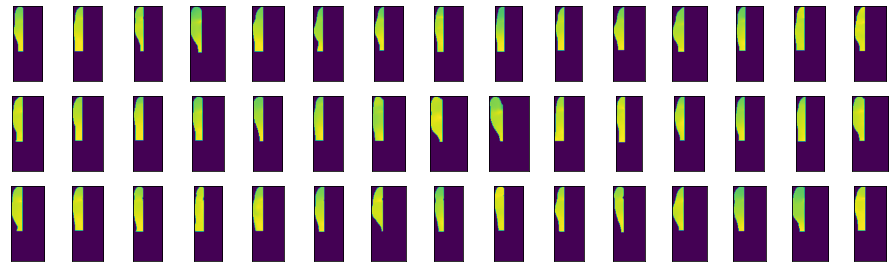

In [94]:
plt.figure(figsize=(16, 8))
for i in range(len(dataset)):
    plt.subplot(5, 15, i+1)
    data = dataset.get_subject(i, DFUData.L_MPA)
    plt.imshow(data.to_numpy())
    plt.xticks([])
    plt.yticks([])

plt.show()

# MPA

In [98]:
l_mpa_metrics = get_metrics(dataset, DFUData.L_MPA)
r_mpa_metrics = get_metrics(dataset, DFUData.R_MPA)

l_mpa_metrics.to_csv('data/L_MPA_metrics.csv', index=False)
r_mpa_metrics.to_csv('data/R_MPA_metrics.csv', index=False)

# LCA

In [99]:
l_lca_metrics = get_metrics(dataset, DFUData.L_LCA)
r_lca_metrics = get_metrics(dataset, DFUData.R_LCA)

l_lca_metrics.to_csv('data/L_LCA_metrics.csv', index=False)
r_lca_metrics.to_csv('data/R_LCA_metrics.csv', index=False)

# LPA

In [101]:
l_lpa_metrics = get_metrics(dataset, DFUData.L_LPA)
r_lpa_metrics = get_metrics(dataset, DFUData.R_LPA)

l_lpa_metrics.to_csv('data/L_LPA_metrics.csv', index=False)
r_lpa_metrics.to_csv('data/R_LPA_metrics.csv', index=False)

# MCA

In [102]:
l_mca_metrics = get_metrics(dataset, DFUData.L_MCA)
r_mca_metrics = get_metrics(dataset, DFUData.R_MCA)

l_mca_metrics.to_csv('data/L_MCA_metrics.csv', index=False)
r_mca_metrics.to_csv('data/R_MCA_metrics.csv', index=False)

# Full Foot

In [103]:
l_metrics = get_metrics(dataset, DFUData.L)
r_metrics = get_metrics(dataset, DFUData.R)

l_metrics.to_csv('data/L_metrics.csv', index=False)
r_metrics.to_csv('data/R_metrics.csv', index=False)